In [41]:
import massimal.pipeline
from pathlib import Path
import importlib
import massimal.image_render
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_dir = Path('/media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301001-south-test_hsi')

In [16]:
# Parameters
rgb_ind = (30,78,126)
nir_band = (740,805)
nir_ignore_band=(753,773)

In [42]:
importlib.reload(massimal.pipeline)
proc = massimal.pipeline.PipelineProcessor(dataset_dir=dataset_dir)

15:53:22 INFO: Logging started.


In [4]:
# proc.run()

In [19]:
def get_nir_ind(wl,nir_band = (740,805),nir_ignore_band=(753,773)):
    nir_ind = (wl>=nir_band[0]) & (wl<=nir_band[1])
    ignore_ind = (wl>=nir_ignore_band[0]) & (wl<=nir_ignore_band[1])
    nir_ind = nir_ind & ~ignore_ind
    return nir_ind

In [5]:
refl_im, refl_wl, refl_meta = massimal.pipeline.read_envi(proc.reflectance_image_paths[0])

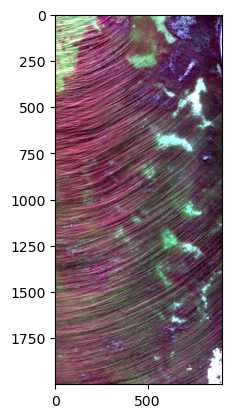

In [9]:
fig = plt.figure()
plt.imshow(massimal.image_render.percentile_stretch(refl_im[:,:,rgb_ind]))
plt.show()

In [33]:
nir_ind = get_nir_ind(refl_wl)
nir_im = np.mean(refl_im[:,:,nir_ind],axis=2,keepdims=True)

/tmp/ipykernel_229991/2028711926.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(nir_im.squeeze()),vmin=-2.5,vmax=-1.7)


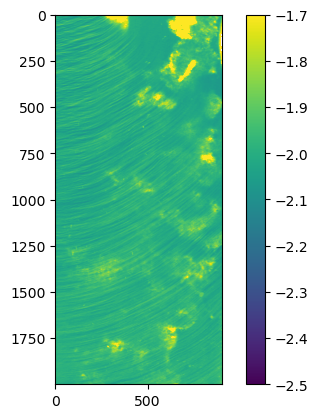

In [34]:
fig = plt.figure()
plt.imshow(np.log10(nir_im.squeeze()),vmin=-2.5,vmax=-1.7)
plt.colorbar()

In [43]:
# refl_im_sgc = refl_im - nir_im
glint_corrector = massimal.pipeline.GlintCorrector()
refl_im_gc = glint_corrector.remove_glint_flat_spec(refl_im,refl_wl)

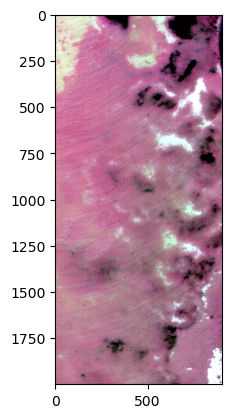

In [44]:
fig = plt.figure()
plt.imshow(massimal.image_render.percentile_stretch(refl_im_gc[:,:,rgb_ind]))
plt.show()

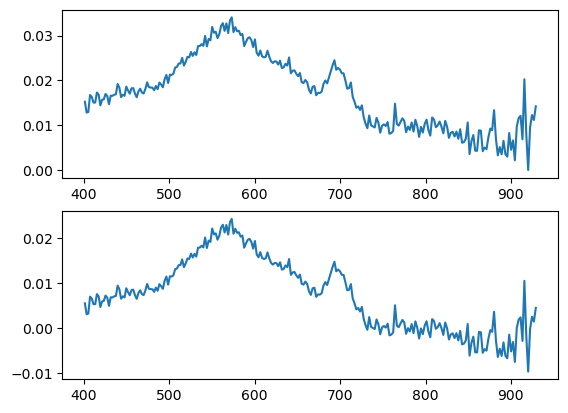

In [40]:
fig,ax = plt.subplots(nrows=2)
ax[0].plot(refl_wl, refl_im[700,600])
ax[1].plot(refl_wl, refl_im_gc[700,600])
# plt.xlim((750,850))
plt.show()

In [10]:
irrad_spec, irrad_wl, irrad_meta = massimal.pipeline.read_envi(proc.irradiance_spec_paths[0])

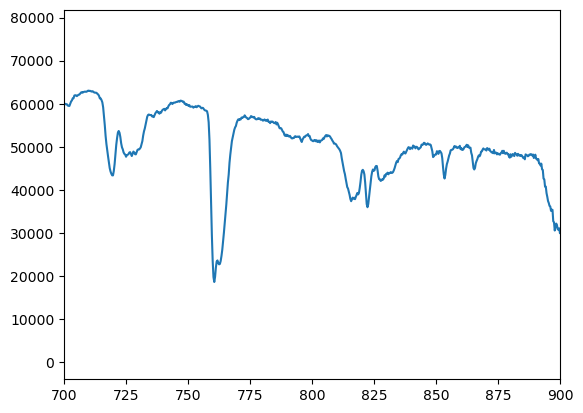

In [12]:
fig = plt.figure()
plt.plot(irrad_wl, irrad_spec.squeeze())
plt.xlim((700,900))
plt.show()

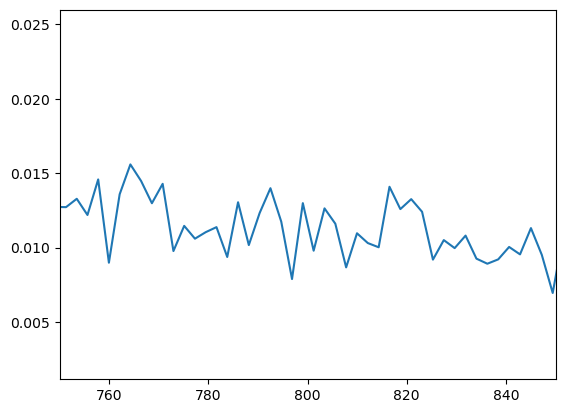

In [15]:
fig = plt.figure()
plt.plot(refl_wl, refl_im[500,300])
plt.xlim((750,850))
plt.show()